In [1]:
# import librairies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


# Part 1 - Data preprocessing

In [2]:
# import training_set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
# Select Open column on training_set
training_set = dataset_train[['Open']]
training_set.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [4]:
# Convert pandas series to numpy array
training_set = training_set.values
training_set[:5]

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04]])

In [5]:
# Feature scaling
sc = MinMaxScaler()

training_set_scaled = sc.fit_transform(training_set)

print('Minimum value of training_set_scaled: {}'.format(training_set_scaled.min()))
print('Maximum value of training_set_scaled: {}'.format(training_set_scaled.max()))

Minimum value of training_set_scaled: 0.0
Maximum value of training_set_scaled: 1.0


In [6]:
# structure of training_set: 60 timesteps (X) and 1 output (y)
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[(i-60):i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train[0])
print(y_train[0])

[0.08581368 0.09701243 0.09433366 0.09156187 0.07984225 0.0643277
 0.0585423  0.06568569 0.06109085 0.06639259 0.0614257  0.07474514
 0.02797827 0.02379269 0.02409033 0.0159238  0.01078949 0.00967334
 0.01642607 0.02100231 0.02280676 0.02273235 0.02810849 0.03212665
 0.0433812  0.04475779 0.04790163 0.0440695  0.04648783 0.04745517
 0.04873875 0.03936305 0.04137213 0.04034898 0.04784582 0.04325099
 0.04356723 0.04286033 0.04602277 0.05398467 0.05738894 0.05714711
 0.05569611 0.04421832 0.04514845 0.04605997 0.04412531 0.03675869
 0.04486941 0.05065481 0.05214302 0.05612397 0.05818885 0.06540665
 0.06882953 0.07243843 0.07993526 0.07846566 0.08034452 0.08497656]
0.08627874097775134


In [7]:
# Reshaping X_train
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train[0][0]

array([0.08581368])

# Part 2 - RNN construction

In [8]:
# Init RNN
regressor = Sequential()

In [9]:
# First LSTM & Dropout layers
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
# Second LSTM & Dropout layers
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [11]:
# Third LSTM & Dropout layers
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [12]:
# Fourth LSTM & Dropout layers
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [13]:
# Output layer
regressor.add(Dense(units=1))

In [14]:
# Compile model
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# Fit model
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0520
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0055
Epoch 3/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0051
Epoch 4/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0049
Epoch 5/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0058
Epoch 6/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0045
Epoch 7/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0043
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0046
Epoch 9/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0051
Epoch 11/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0049
Epoch 12/100
1198/1198 [==

1198/1198 [==============================] - 4s 4ms/step - loss: 0.0015
Epoch 95/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0015
Epoch 96/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0017
Epoch 97/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0017
Epoch 99/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0013
Epoch 100/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0014


# Part 3 - Predictions & Visualizations

In [16]:
# import test_set
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [17]:
# Select Open column on test_set
test_set = dataset_test[['Open']]
test_set.head()

,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


In [18]:
# Convert pandas series to numpy array
real_stock_price = np.array(test_set)
real_stock_price[:5]

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ]])

In [19]:
# Concat dataset_train & dataset_test
dataset_total = pd.concat((dataset_train, dataset_test), axis=0)
dataset_total.shape

(1278, 6)

In [20]:
# Select Open column on dataset_total
dataset_total = dataset_total[['Open']]
dataset_total.shape

(1278, 1)

In [21]:
# Collect the first 60th values before the first day on dataset_test
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:]
inputs = np.array(inputs)
inputs = inputs.reshape(-1, 1)
inputs[:5]

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76]])

In [22]:
# Feature scaling on inputs
inputs = sc.transform(inputs)
inputs[:5]

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032]])

In [23]:
# structure of test_set: 60 timesteps (X)
X_test = []

for i in range(60, 80):
    X_test.append(inputs[(i-60):i, 0])
    
X_test = np.array(X_test)

print(X_test[0])

[0.9299055  0.93113327 0.92750577 0.94415507 0.93876032 0.93403527
 0.93483518 0.9313937  0.94636878 0.96569685 0.97510976 0.95966962
 0.97808617 1.         0.98076494 0.97083116 0.98450406 0.96054394
 0.9371419  0.92841729 0.90804747 0.8771858  0.92153434 0.93809063
 0.93165414 0.95254483 0.88812412 0.88637547 0.87032145 0.88563137
 0.90743359 0.91571173 0.89941588 0.91805566 0.9089404  0.9024853
 0.89456061 0.91600938 0.9132934  0.88979835 0.86589404 0.89030062
 0.90335962 0.89642086 0.91777662 0.93176576 0.94114145 0.95762334
 0.96413424 0.96402262 0.96971501 0.95077759 0.96294367 0.96123223
 0.95475854 0.95204256 0.95163331 0.95725128 0.93796041 0.93688146]


In [24]:
# Reshaping X_test
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test[0][0]

array([0.9299055])

In [25]:
# Predictions of stock prices
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price[:5]

array([[0.9236753 ],
       [0.91854286],
       [0.91889346],
       [0.9215169 ],
       [0.92765474]], dtype=float32)

In [26]:
# Inverse transform on predicted_stock_price
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price[:5]

array([[775.6509 ],
       [772.89185],
       [773.0803 ],
       [774.4906 ],
       [777.79004]], dtype=float32)

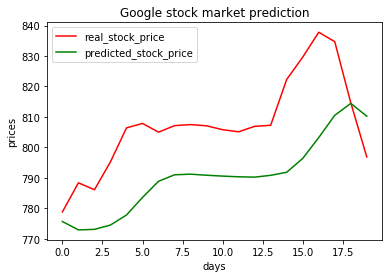

In [27]:
# Visualization of stock markets
plt.plot(real_stock_price, color='red', label='real_stock_price')
plt.plot(predicted_stock_price, color='green', label='predicted_stock_price')
plt.title('Google stock market prediction')
plt.xlabel('days')
plt.ylabel('prices')
plt.legend()
plt.show()